PROYECTO EQUIPO 3 resumen

OBJETIVO
RESPONDER LA PREGUNTA TENIENDO 10 REPRESENTANTES DE VENTAS DENTALES PARA ABARCAR EL TOTAL DEL TERRITORIO NACIONAL, DONDE SON LOS ESTADOS O TERRITORIOS MAS RENTABLES PARA ASIGNARLOS

1-CONOCER LA CANTIDAD DE DENTISTAS QUE SE ENCUENTRAN EN LA REPUBLICA MEXICANA CON INFORMACION MINIMA DE ESTADO

1.1 USAR API GOOGLE PARA CONOCER ESTA INFORMACION
PARA ESTO SE DECIDIO HACER LA BUSQUEDA A NIVEL MUNICIPIO POR ESTADO 

1.1.1 SE GENERA UN MUESTREO CON LA INFORMACION DE LOS MUNICIPIOS DEL ESTADO DE GUANAJUATO

In [1]:
# Create code to answer each of the following questions.
# Hint: You will need multiple target URLs and multiple API requests.

# Dependencies
import gmaps
import requests
import json
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Google API Key
from config import gkey
gmaps.configure(api_key=gkey)

In [2]:

#busqueda de la lat y long de los municipios
LISTAESTADOS=['Guanajuato,Abasolo',	'Guanajuato,Acámbaro',	'Guanajuato,Apaseo el Alto',	'Guanajuato,Apaseo el Grande',	'Guanajuato,Celaya',	'Guanajuato,Ciudad Manuel Doblado',	'Guanajuato,Comonfort',	'Guanajuato,Cortazar',	'Guanajuato,Cuerámaro',	'Guanajuato,Doctor Mora',	'Guanajuato,Dolores Hidalgo Cuna de la Independencia Nacional',	'Guanajuato,Empalme Escobedo',	'Guanajuato,Guanajuato',	'Guanajuato,Huanímaro',	'Guanajuato,Irapuato',	'Guanajuato,Jaral del Progreso',	'Guanajuato,Jerécuaro',	'Guanajuato,León de los Aldama',	'Guanajuato,Marfil',	'Guanajuato,Moroleón',	'Guanajuato,Pénjamo',	'Guanajuato,Purísima de Bustos',	'Guanajuato,Rincón de Tamayo',	'Guanajuato,Romita',	'Guanajuato,Salamanca',	'Guanajuato,Salvatierra',	'Guanajuato,San Diego de la Unión',	'Guanajuato,San Francisco del Rincón',	'Guanajuato,San José Iturbide',	'Guanajuato,San Luis de la Paz',	'Guanajuato,San Miguel de Allende',	'Guanajuato,Santa Cruz Juventino Rosas',	'Guanajuato,Santiago Maravatío',	'Guanajuato,Silao',	'Guanajuato,Tarandacuao',	'Guanajuato,Uriangato',	'Guanajuato,Valle de Santiago',	'Guanajuato,Villagrán',	'Guanajuato,Yuriria']
basedentista = pd.DataFrame (columns = ['DENTIST Name','DENTIST Address','LAT','LONG','ESTADO'])

for cp in LISTAESTADOS:
    try:
        params = {
                   "address": cp,
                   "key": gkey
                 }

        base_url = "https://maps.googleapis.com/maps/api/geocode/json"

        my_geo = requests.get(base_url, params).json()

        lat = my_geo["results"][0]["geometry"]["location"]["lat"]
        lng = my_geo["results"][0]["geometry"]["location"]["lng"]

        #busqueda de los dentistas
        target_type = "dentist"
        radius = 30000

# rewrite params dict

        params = {
        "location": f"{lat},{lng}",
        "types": target_type,
        "radius": radius,
        "key": gkey
         }

# Build URL using the Google Maps API
        base_url = "https://maps.googleapis.com/maps/api/place/nearbysearch/json"


# Run request
        response = requests.get(base_url, params)

# print the response URL, avoid doing for public GitHub repos in order to avoid exposing key
# print(response.url)

        busquedadentista = response.json()

# Print the JSON (pretty printed)
#print(json.dumps(seattle_bikes, indent=4, sort_keys=True))
        a=len(basedentista.index)
        b=0
        for place in busquedadentista["results"]:
            basedentista.loc[a,"DENTIST Name"] = busquedadentista["results"][b]["name"]
            basedentista.loc[a,"DENTIST Address"] = busquedadentista["results"][b]["vicinity"]
            basedentista.loc[a,"DENTIST Address"] = busquedadentista["results"][b]["vicinity"]
            basedentista.loc[a,"LAT"] = busquedadentista["results"][b]["geometry"]["location"]["lat"]
            basedentista.loc[a,"LONG"] = busquedadentista["results"][b]["geometry"]["location"]["lng"]
            basedentista.loc[a,"ESTADO"] = busquedadentista["results"][b]["plus_code"]["compound_code"]
            b=b+1
            a=a+1
            
        print(f"{cp} ciudad encontrada")
    except:
        print(f"{cp} ciudad no encontrada")
        pass
#print(busquedadentista["results"][0]["name"])
#print(busquedadentista["results"][0]["vicinity"])
basedentista

Guanajuato,Abasolo ciudad encontrada
Guanajuato,Acámbaro ciudad encontrada
Guanajuato,Apaseo el Alto ciudad encontrada
Guanajuato,Apaseo el Grande ciudad encontrada
Guanajuato,Celaya ciudad encontrada
Guanajuato,Ciudad Manuel Doblado ciudad encontrada
Guanajuato,Comonfort ciudad encontrada
Guanajuato,Cortazar ciudad encontrada
Guanajuato,Cuerámaro ciudad no encontrada
Guanajuato,Doctor Mora ciudad encontrada
Guanajuato,Dolores Hidalgo Cuna de la Independencia Nacional ciudad encontrada
Guanajuato,Empalme Escobedo ciudad encontrada
Guanajuato,Guanajuato ciudad no encontrada
Guanajuato,Huanímaro ciudad encontrada
Guanajuato,Irapuato ciudad encontrada
Guanajuato,Jaral del Progreso ciudad encontrada
Guanajuato,Jerécuaro ciudad encontrada
Guanajuato,León de los Aldama ciudad encontrada
Guanajuato,Marfil ciudad no encontrada
Guanajuato,Moroleón ciudad encontrada
Guanajuato,Pénjamo ciudad no encontrada
Guanajuato,Purísima de Bustos ciudad encontrada
Guanajuato,Rincón de Tamayo ciudad encontra

,DENTIST Name,DENTIST Address,LAT,LONG,ESTADO
0,DENT-AL Odontologia Familiar y Estética.,"Ignacio Zaragoza, Zona Centro, Pénjamo",20.4277,-101.723,"C7HG+3Q Pénjamo, Guanajuato, Mexico"
1,Orthomaster Clínica Dental,"San Luis Rey 450, El Milagro, Irapuato",20.6602,-101.383,"MJ68+3V Irapuato, Guanajuato, Mexico"
2,Centro de Ortodoncia,"Gustavo Díaz Ordaz 3195, Irapuato",20.6636,-101.366,"MJ7M+CP Irapuato, Guanajuato, Mexico"
3,Zirkonzahn Mèxico SA DE CV,"Paseo Mirador del Valle 5577, Villas de Irapua...",20.69,-101.394,"MJR4+28 Villas de Irapuato, Gto., Mexico"
4,Centro de Estudios de Ortodoncia del Bajío,"Boulevard Lázaro Cárdenas 1477, Prolongacion M...",20.6774,-101.367,"MJGM+X7 Irapuato, Guanajuato, Mexico"
...,...,...,...,...,...
689,Live Smile,"Maclovio Herrera #27, Centro, Yuriria",20.2089,-101.136,"6V57+HG Yuriria, Guanajuato, Mexico"
690,Dental Life Yuriria,"A, San Cayetano 41, La Aldea, Yuriria",20.2085,-101.137,"6V57+C6 Yuriria, Guanajuato, Mexico"
691,Centro Dental Yuriria,"Estación 16, Las Flores, Yuriria",20.2097,-101.138,"6V56+VW Yuriria, Guanajuato, Mexico"
692,Oscar Ramírez Tovar,"carretera, Salvatierra - Yuriria 16, Salvatierra",20.2106,-101.14,"6V66+64 Yuriria, Guanajuato, Mexico"


In [3]:
base2 = basedentista.dropna(subset=["DENTIST Name"])
numerogoogleguanajuato=len(base2)
print (numerogoogleguanajuato)
base2


694


,DENTIST Name,DENTIST Address,LAT,LONG,ESTADO
0,DENT-AL Odontologia Familiar y Estética.,"Ignacio Zaragoza, Zona Centro, Pénjamo",20.4277,-101.723,"C7HG+3Q Pénjamo, Guanajuato, Mexico"
1,Orthomaster Clínica Dental,"San Luis Rey 450, El Milagro, Irapuato",20.6602,-101.383,"MJ68+3V Irapuato, Guanajuato, Mexico"
2,Centro de Ortodoncia,"Gustavo Díaz Ordaz 3195, Irapuato",20.6636,-101.366,"MJ7M+CP Irapuato, Guanajuato, Mexico"
3,Zirkonzahn Mèxico SA DE CV,"Paseo Mirador del Valle 5577, Villas de Irapua...",20.69,-101.394,"MJR4+28 Villas de Irapuato, Gto., Mexico"
4,Centro de Estudios de Ortodoncia del Bajío,"Boulevard Lázaro Cárdenas 1477, Prolongacion M...",20.6774,-101.367,"MJGM+X7 Irapuato, Guanajuato, Mexico"
...,...,...,...,...,...
689,Live Smile,"Maclovio Herrera #27, Centro, Yuriria",20.2089,-101.136,"6V57+HG Yuriria, Guanajuato, Mexico"
690,Dental Life Yuriria,"A, San Cayetano 41, La Aldea, Yuriria",20.2085,-101.137,"6V57+C6 Yuriria, Guanajuato, Mexico"
691,Centro Dental Yuriria,"Estación 16, Las Flores, Yuriria",20.2097,-101.138,"6V56+VW Yuriria, Guanajuato, Mexico"
692,Oscar Ramírez Tovar,"carretera, Salvatierra - Yuriria 16, Salvatierra",20.2106,-101.14,"6V66+64 Yuriria, Guanajuato, Mexico"


1.1.1 RESULTADO 694 DENTISTAS UNICOS EN EL ESTADO DE GUANAJUTO SEGUN API GOOGLE Y LA LOGICA GENERADA

1.2 EXPLORAR LA BASE DE DATOS DEL CENSO 2019 DE ACTIVIDADES ECONOMICAS DE MEXICO USANDO "Consultorios dentales del sector privado"  (INSERTAR LINK A BASE)


In [4]:
file_to_load = "denue_filtrado.csv"
denue_data = pd.read_csv(file_to_load, encoding = "ISO-8859-1")
denue_data.head()

,ï»¿nom_estab,codigo_act,nombre_act,per_ocu,cod_postal,cve_ent,entidad,cve_mun,municipio,cve_loc,localidad,latitud,longitud,fecha_alta
0,AD ODONTOLOGIA AVANZADA,621211,Consultorios dentales del sector privado,0 a 5 personas,20127.0,1,AGUASCALIENTES,1,Aguascalientes,1,Aguascalientes,21.917209,-102.313807,2019-11
1,ALFA DENTAL,621211,Consultorios dentales del sector privado,0 a 5 personas,20400.0,1,AGUASCALIENTES,7,RincÃÂ³n de Romos,1,RincÃÂ³n de Romos,22.230236,-102.320867,2014-12
2,ALORA +DENT DENTISTA,621211,Consultorios dentales del sector privado,0 a 5 personas,20299.0,1,AGUASCALIENTES,1,Aguascalientes,1,Aguascalientes,21.906590,-102.240146,2019-11
3,AMG DENTAL,621211,Consultorios dentales del sector privado,0 a 5 personas,20000.0,1,AGUASCALIENTES,1,Aguascalientes,1,Aguascalientes,21.880631,-102.295082,2010-07
4,ARA-DENTAL CLINIC,621211,Consultorios dentales del sector privado,0 a 5 personas,20236.0,1,AGUASCALIENTES,1,Aguascalientes,1,Aguascalientes,21.866162,-102.308286,2019-11


In [5]:
denue_data.columns = ['Nombre dentista','codigo_act','nombre_actividad','per_ocu','cod_postal','cve_ent','entidad','cve_mun','municipio','cve_loc','localidad','latitud','longitud','fecha_alta']

In [6]:
numeroinegiguanajuato=len(denue_data[denue_data['entidad'] == 'GUANAJUATO'])
numeroinegiguanajuato

3234

1.2.1 REVISANDO LA CANTIDAD DE DENTISTAS UNICOS EN GUANAJUATO SON 3234

<BarContainer object of 2 artists>

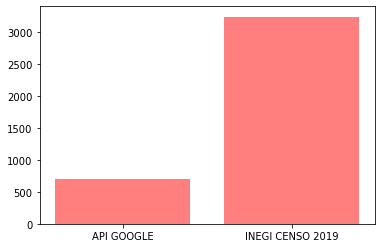

In [7]:
dentistasguana = [numerogoogleguanajuato, numeroinegiguanajuato]
x_axis = np.arange(len(dentistasguana))
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ["API GOOGLE","INEGI CENSO 2019"])
plt.bar(x_axis, dentistasguana, color='r', alpha=0.5, align="center")

1 CONCLUSION : AL COMPARAR EL MISMO ESTADO ENCONTRAMOS QUE LA BASE DE DATOS DE INEGI CONTIENE MAS DETALLE DE DENTISTAS EN MEXICO, ASI QUE USAREMOS ESTA BASE PARA NUESTRO EJERCICIO.

2 ESTADISTICAS RELACIONABLES DE DENTISTAS EN MEXICO

In [8]:
RELACIONESTADO=denue_data['entidad'].value_counts()
RELACIONESTADO

MEXICO                             7944
CIUDAD DE MEXICO                   7318
JALISCO                            4222
MICHOACAN DE OCAMPO                3934
VERACRUZ DE IGNACIO DE LA LLAVE    3275
GUANAJUATO                         3234
PUEBLA                             3171
BAJA CALIFORNIA                    2661
NUEVO LEON                         2529
OAXACA                             1938
SINALOA                            1860
TAMAULIPAS                         1794
CHIHUAHUA                          1649
SAN LUIS POTOSI                    1582
HIDALGO                            1439
COAHUILA DE ZARAGOZA               1433
CHIAPAS                            1393
QUERETARO                          1269
SONORA                             1235
GUERRERO                           1119
MORELOS                            1107
ZACATECAS                          1011
YUCATAN                             997
AGUASCALIENTES                      839
NAYARIT                             774


In [9]:
RELACIONESTADODENTIS = pd.DataFrame(denue_data['entidad'].value_counts().reset_index().values, columns=["ESTADO", "NODENTISTAS"])
RELACIONESTADODENTIS

,ESTADO,NODENTISTAS
0,MEXICO,7944
1,CIUDAD DE MEXICO,7318
2,JALISCO,4222
3,MICHOACAN DE OCAMPO,3934
4,VERACRUZ DE IGNACIO DE LA LLAVE,3275
5,GUANAJUATO,3234
6,PUEBLA,3171
7,BAJA CALIFORNIA,2661
8,NUEVO LEON,2529
9,OAXACA,1938


In [10]:
RELACIONESTADODENTIS['%SHARE'] = (RELACIONESTADODENTIS.NODENTISTAS / sum(RELACIONESTADODENTIS["NODENTISTAS"]))*100
RELACIONESTADODENTIS

,ESTADO,NODENTISTAS,%SHARE
0,MEXICO,7944,12.5343
1,CIUDAD DE MEXICO,7318,11.5466
2,JALISCO,4222,6.66162
3,MICHOACAN DE OCAMPO,3934,6.2072
4,VERACRUZ DE IGNACIO DE LA LLAVE,3275,5.16741
5,GUANAJUATO,3234,5.10272
6,PUEBLA,3171,5.00331
7,BAJA CALIFORNIA,2661,4.19862
8,NUEVO LEON,2529,3.99034
9,OAXACA,1938,3.05784


In [11]:
file_to_load = "estadospoblacion.csv"
poblacionxestado = pd.read_csv(file_to_load, encoding = "ISO-8859-1")
poblacionxestado.columns = ['ESTADO','POBLACION']
poblacionxestado.head()

,ESTADO,POBLACION
0,AGUASCALIENTES,1184996
1,BAJA CALIFORNIA,3155070
2,BAJA CALIFORNIA SUR,637026
3,CAMPECHE,822441
4,COAHUILA DE ZARAGOZA,2748391


In [12]:
MERGEESTADODENTIS = pd.merge(RELACIONESTADODENTIS, poblacionxestado, on="ESTADO")
MERGEESTADODENTIS['ESTADO'] = MERGEESTADODENTIS['ESTADO'].replace(
    {'BAJA CALIFORNIA': 'BAJA CALIFORNIA NORTE, MEXICO', 'SONORA': 'SONORA, MEXICO','DURANGO':'DURANGO, MEXICO','MEXICO':'ESTADO DE MEXICO,MEXICO'})
MERGEESTADODENTIS

,ESTADO,NODENTISTAS,%SHARE,POBLACION
0,"ESTADO DE MEXICO,MEXICO",7944,12.5343,15175862
1,CIUDAD DE MEXICO,7318,11.5466,8851080
2,JALISCO,4222,6.66162,7350682
3,MICHOACAN DE OCAMPO,3934,6.2072,4351037
4,VERACRUZ DE IGNACIO DE LA LLAVE,3275,5.16741,7643194
5,GUANAJUATO,3234,5.10272,5486372
6,PUEBLA,3171,5.00331,5779829
7,"BAJA CALIFORNIA NORTE, MEXICO",2661,4.19862,3155070
8,NUEVO LEON,2529,3.99034,4653458
9,OAXACA,1938,3.05784,3801962


In [13]:
#busqueda de la lat y long de los municipios
LISTAESTADOS=MERGEESTADODENTIS["ESTADO"]
baselatlon= pd.DataFrame (columns = ['ESTADO','LAT','LONG'])
a=0
for cp in LISTAESTADOS:
    try:
        params = {
                   "address": cp,
                   "key": gkey
                 }

        base_url = "https://maps.googleapis.com/maps/api/geocode/json"

        my_geo = requests.get(base_url, params).json()

        lat = my_geo["results"][0]["geometry"]["location"]["lat"]
        lng = my_geo["results"][0]["geometry"]["location"]["lng"]


        baselatlon.loc[a,"ESTADO"] = cp
        baselatlon.loc[a,"LAT"] = lat
        baselatlon.loc[a,"LONG"] = lng
        a=a+1
            
        print(f"{cp} Estado encontrada")
    except:
        print(f"{cp} Estado no encontrado")
        a=a+1
        pass
#print(busquedadentista["results"][0]["name"])
#print(busquedadentista["results"][0]["vicinity"])
baselatlon

ESTADO DE MEXICO,MEXICO Estado encontrada
CIUDAD DE MEXICO Estado encontrada
JALISCO Estado encontrada
MICHOACAN DE OCAMPO Estado encontrada
VERACRUZ DE IGNACIO DE LA LLAVE Estado encontrada
GUANAJUATO Estado encontrada
PUEBLA Estado encontrada
BAJA CALIFORNIA NORTE, MEXICO Estado encontrada
NUEVO LEON Estado encontrada
OAXACA Estado encontrada
SINALOA Estado encontrada
TAMAULIPAS Estado encontrada
CHIHUAHUA Estado encontrada
SAN LUIS POTOSI Estado encontrada
HIDALGO Estado encontrada
COAHUILA DE ZARAGOZA Estado encontrada
CHIAPAS Estado encontrada
QUERETARO Estado encontrada
SONORA, MEXICO Estado encontrada
GUERRERO Estado encontrada
MORELOS Estado encontrada
ZACATECAS Estado encontrada
YUCATAN Estado encontrada
AGUASCALIENTES Estado encontrada
NAYARIT Estado encontrada
DURANGO, MEXICO Estado encontrada
TLAXCALA Estado encontrada
TABASCO Estado encontrada
QUINTANA ROO Estado encontrada
COLIMA Estado encontrada
BAJA CALIFORNIA SUR Estado encontrada
CAMPECHE Estado encontrada


,ESTADO,LAT,LONG
0,"ESTADO DE MEXICO,MEXICO",19.4969,-99.7233
1,CIUDAD DE MEXICO,19.4326,-99.1332
2,JALISCO,20.6595,-103.349
3,MICHOACAN DE OCAMPO,19.5665,-101.707
4,VERACRUZ DE IGNACIO DE LA LLAVE,19.2602,-96.5783
5,GUANAJUATO,21.019,-101.257
6,PUEBLA,19.0414,-98.2063
7,"BAJA CALIFORNIA NORTE, MEXICO",30.8406,-115.284
8,NUEVO LEON,25.5922,-99.9962
9,OAXACA,17.0732,-96.7266


In [14]:
MERGEESTADODENTISGEO = pd.merge(MERGEESTADODENTIS, baselatlon, on="ESTADO")
MERGEESTADODENTISGEO["POBLACION"] = MERGEESTADODENTISGEO["POBLACION"].apply(pd.to_numeric)
MERGEESTADODENTISGEO2=MERGEESTADODENTISGEO.set_index('ESTADO')
MERGEESTADODENTISGEO ['ESTADO'] = MERGEESTADODENTISGEO ['ESTADO'].replace(
    {'BAJA CALIFORNIA NORTE, MEXICO':'BAJA CALIFORNIA', 'SONORA, MEXICO':'SONORA','DURANGO, MEXICO':'DURANGO','ESTADO DE MEXICO,MEXICO':'MEXICO'})
MERGEESTADODENTISGEO['POBLACIONK'] = (MERGEESTADODENTISGEO.POBLACION / 1000)
MERGEESTADODENTISGEO 

,ESTADO,NODENTISTAS,%SHARE,POBLACION,LAT,LONG,POBLACIONK
0,MEXICO,7944,12.5343,15175862,19.4969,-99.7233,15175.862
1,CIUDAD DE MEXICO,7318,11.5466,8851080,19.4326,-99.1332,8851.080
2,JALISCO,4222,6.66162,7350682,20.6595,-103.349,7350.682
3,MICHOACAN DE OCAMPO,3934,6.2072,4351037,19.5665,-101.707,4351.037
4,VERACRUZ DE IGNACIO DE LA LLAVE,3275,5.16741,7643194,19.2602,-96.5783,7643.194
5,GUANAJUATO,3234,5.10272,5486372,21.019,-101.257,5486.372
6,PUEBLA,3171,5.00331,5779829,19.0414,-98.2063,5779.829
7,BAJA CALIFORNIA,2661,4.19862,3155070,30.8406,-115.284,3155.070
8,NUEVO LEON,2529,3.99034,4653458,25.5922,-99.9962,4653.458
9,OAXACA,1938,3.05784,3801962,17.0732,-96.7266,3801.962


In [15]:
file_to_load = "EXTENSIONTERRITORIAL.csv"
extensionxestado = pd.read_csv(file_to_load, encoding = "ISO-8859-1")
extensionxestado.columns = ['ESTADO','EXTENSIONKM']
extensionxestado.head()

,ESTADO,EXTENSIONKM
0,CHIHUAHUA,247455
1,SONORA,179355
2,COAHUILA DE ZARAGOZA,151562
3,DURANGO,123317
4,OAXACA,93757


In [16]:
MERGEESTADODENTISGEO = pd.merge(MERGEESTADODENTISGEO , extensionxestado, on="ESTADO")
MERGEESTADODENTISGEO['EXTENSIONKMK'] = (MERGEESTADODENTISGEO.EXTENSIONKM/100)
MERGEESTADODENTISGEO['POBLA/km2'] = (MERGEESTADODENTISGEO.POBLACION/MERGEESTADODENTISGEO.EXTENSIONKM)
MERGEESTADODENTISGEO['DENTISTAS/km2'] = (MERGEESTADODENTISGEO.EXTENSIONKM/MERGEESTADODENTISGEO.NODENTISTAS)
MERGEESTADODENTISGEO['DENTISTAS/POBLACION'] = (MERGEESTADODENTISGEO.POBLACION/MERGEESTADODENTISGEO.NODENTISTAS)
#cambiar division entre poblacion /dentis
#EXPORTAR BASE A CSV RESUMEN AGREGAR ELENA
MERGEESTADODENTISGEO

,ESTADO,NODENTISTAS,%SHARE,POBLACION,LAT,LONG,POBLACIONK,EXTENSIONKM,EXTENSIONKMK,POBLA/km2,DENTISTAS/km2,DENTISTAS/POBLACION
0,MEXICO,7944,12.5343,15175862,19.4969,-99.7233,15175.862,22351,223.51,678.979106,2.81357,1910.36
1,CIUDAD DE MEXICO,7318,11.5466,8851080,19.4326,-99.1332,8851.080,1495,14.95,5920.454849,0.204291,1209.49
2,JALISCO,4222,6.66162,7350682,20.6595,-103.349,7350.682,78588,785.88,93.534407,18.6139,1741.04
3,MICHOACAN DE OCAMPO,3934,6.2072,4351037,19.5665,-101.707,4351.037,58599,585.99,74.251045,14.8955,1106.01
4,VERACRUZ DE IGNACIO DE LA LLAVE,3275,5.16741,7643194,19.2602,-96.5783,7643.194,71826,718.26,106.412636,21.9316,2333.8
5,GUANAJUATO,3234,5.10272,5486372,21.019,-101.257,5486.372,30608,306.08,179.246341,9.46444,1696.47
6,PUEBLA,3171,5.00331,5779829,19.0414,-98.2063,5779.829,34306,343.06,168.478663,10.8187,1822.71
7,BAJA CALIFORNIA,2661,4.19862,3155070,30.8406,-115.284,3155.070,71450,714.50,44.157733,26.8508,1185.67
8,NUEVO LEON,2529,3.99034,4653458,25.5922,-99.9962,4653.458,64156,641.56,72.533481,25.3681,1840.04
9,OAXACA,1938,3.05784,3801962,17.0732,-96.7266,3801.962,93757,937.57,40.551234,48.3782,1961.8


In [22]:
file_to_load = "PODERAQUISITIVOPORESTADO.csv"
PODERADQUISI = pd.read_csv(file_to_load, encoding = "ISO-8859-1")
PODERADQUISI .columns = ['ESTADO','PODERADQUISITIVO']
PODERADQUISI.head()


,ESTADO,PODERADQUISITIVO
0,AGUASCALIENTES,102.82
1,BAJA CALIFORNIA,101.00
2,BAJA CALIFORNIA SUR,107.20
3,CAMPECHE,89.00
4,CHIAPAS,70.02


In [23]:
MERGEESTADODENTISGEO3 = pd.merge(MERGEESTADODENTISGEO, PODERADQUISI, on="ESTADO")
MERGEESTADODENTISGEO3

,ESTADO,NODENTISTAS,%SHARE,POBLACION,LAT,LONG,POBLACIONK,EXTENSIONKM,EXTENSIONKMK,POBLA/km2,DENTISTAS/km2,DENTISTAS/POBLACION,PODERADQUISITIVO
0,MEXICO,7944,12.5343,15175862,19.4969,-99.7233,15175.862,22351,223.51,678.979106,2.81357,1910.36,92.37
1,CIUDAD DE MEXICO,7318,11.5466,8851080,19.4326,-99.1332,8851.080,1495,14.95,5920.454849,0.204291,1209.49,116.50
2,JALISCO,4222,6.66162,7350682,20.6595,-103.349,7350.682,78588,785.88,93.534407,18.6139,1741.04,104.96
3,MICHOACAN DE OCAMPO,3934,6.2072,4351037,19.5665,-101.707,4351.037,58599,585.99,74.251045,14.8955,1106.01,95.87
4,VERACRUZ DE IGNACIO DE LA LLAVE,3275,5.16741,7643194,19.2602,-96.5783,7643.194,71826,718.26,106.412636,21.9316,2333.8,77.91
5,GUANAJUATO,3234,5.10272,5486372,21.019,-101.257,5486.372,30608,306.08,179.246341,9.46444,1696.47,96.91
6,PUEBLA,3171,5.00331,5779829,19.0414,-98.2063,5779.829,34306,343.06,168.478663,10.8187,1822.71,77.38
7,BAJA CALIFORNIA,2661,4.19862,3155070,30.8406,-115.284,3155.070,71450,714.50,44.157733,26.8508,1185.67,101.00
8,NUEVO LEON,2529,3.99034,4653458,25.5922,-99.9962,4653.458,64156,641.56,72.533481,25.3681,1840.04,95.88
9,OAXACA,1938,3.05784,3801962,17.0732,-96.7266,3801.962,93757,937.57,40.551234,48.3782,1961.8,68.60


In [24]:
# Export file as a CSV, without the Pandas index, but with the header
MERGEESTADODENTISGEO3.to_csv("TABLARESULTADO/ARCHIVOFINAL.csv", index=False, header=True)

ESTADOS CON MAYOR CANTIDAD DE DENTISTAS

<BarContainer object of 32 artists>

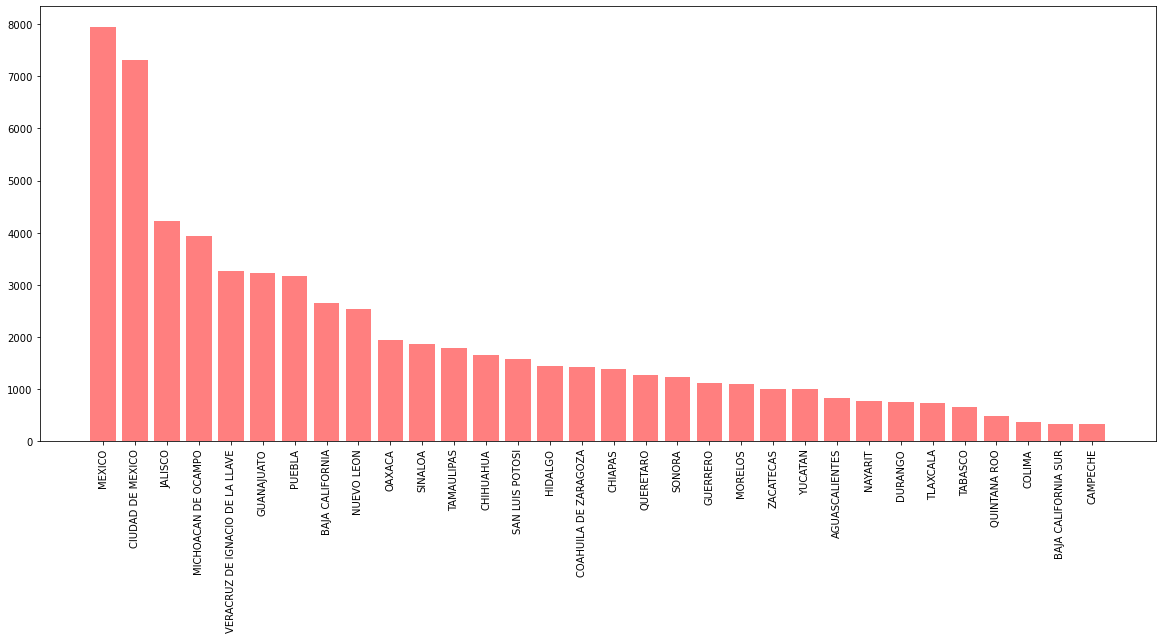

In [25]:
dentistasxestado = MERGEESTADODENTISGEO["NODENTISTAS"]
x_axis = np.arange(len(dentistasxestado))
tick_locations = [value for value in x_axis]
plt.figure(figsize=(20,8)) 
plt.xticks(tick_locations, MERGEESTADODENTISGEO["ESTADO"],rotation='vertical')
plt.bar(x_axis, dentistasxestado, color='r', alpha=0.5, align="center")

GRAFICA DE BARRAS RELACIONAL ENTRE NUMERO DE DENTISTAS, POBLACION (X1000), EXTENSION EN KM

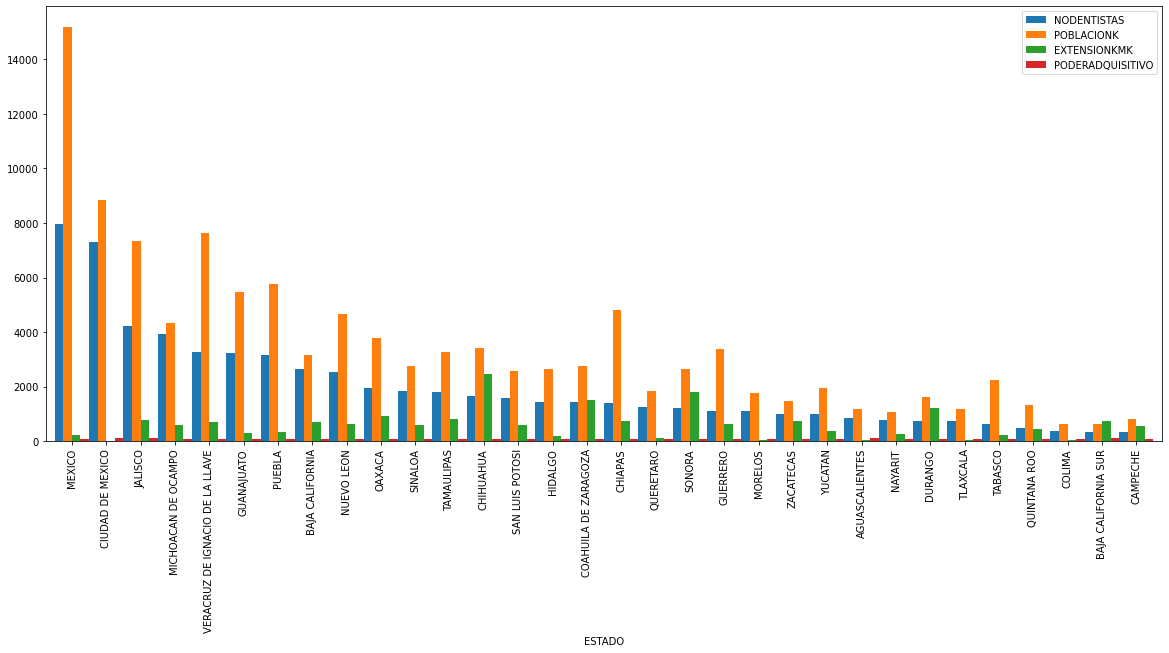

In [27]:
MERGEESTADODENTISGEO3.plot(x="ESTADO",y=["NODENTISTAS","POBLACIONK","EXTENSIONKMK","PODERADQUISITIVO"],kind="bar",figsize=(20,8),width=1)

RELACION POBLACION Y CANTIDAD DE DENTISTAS

In [28]:
denue_data['per_ocu'].value_counts()

0 a 5 personas        61523
6 a 10 personas        1440
11 a 30 personas        390
31 a 50 personas         22
51 a 100 personas         2
101 a 250 personas        1
Name: per_ocu, dtype: int64

In [29]:
RELACIONTAMAÑO = pd.DataFrame(denue_data['per_ocu'].value_counts().reset_index().values, columns=["TAMAÑO", "NODENTISTAS"])
RELACIONTAMAÑO

,TAMAÑO,NODENTISTAS
0,0 a 5 personas,61523
1,6 a 10 personas,1440
2,11 a 30 personas,390
3,31 a 50 personas,22
4,51 a 100 personas,2
5,101 a 250 personas,1


TAMAÑO DE LOS CONSULTORIOS DENTALES

([<matplotlib.patches.Wedge at 0x2a3da8ab370>,
 [Text(0.7741653496097369, -0.7814525010924426, '0 a 5 personas'),
  Text(-0.7579272023808598, 0.7972116129931396, '6 a 10 personas'),
  Text(-0.8270281457270366, 0.7252754278033274, '11 a 30 personas'),
  Text(-0.8416665797030817, 0.7082353906794805, '31 a 50 personas'),
  Text(-0.8425085426599013, 0.7072335933375122, '51 a 100 personas'),
  Text(-0.8426137042127824, 0.7071082982632956, '101 a 250 personas')],
 [Text(0.4222720088780383, -0.4262468187776959, '97.1%'),
  Text(-0.4134148376622871, 0.4348426979962579, '2.3%'),
  Text(-0.4511062613056563, 0.39560477880181494, '0.6%'),
  Text(-0.45909086165622626, 0.3863102130978984, '0.0%'),
  Text(-0.45955011417812786, 0.3857637781840975, '0.0%'),
  Text(-0.459607475025154, 0.38569543541634305, '0.0%')])

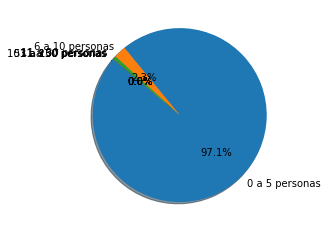

In [30]:
# Labels for the sections of our pie chart
labels = RELACIONTAMAÑO["TAMAÑO"]

# The values of each section of the pie chart
sizes = RELACIONTAMAÑO["NODENTISTAS"]

# The colors of each section of the pie chart
#colors = ["red", "orange", "lightcoral", "lightskyblue"]

# Tells matplotlib to seperate the "Humans" section from the others
#explode = (0.1, 0, 0, 0)
plt.pie(sizes, labels=labels,
        autopct="%1.1f%%", shadow=True, startangle=140)

In [33]:
file_to_load = "baserep.csv"
baserep = pd.read_csv(file_to_load, encoding = "ISO-8859-1")
baserep.columns = ['representante','lat','log']
baserep.head()

,representante,lat,log
0,rep1,21.892991,-102.271119
1,rep2,20.521944,-100.797560
2,rep3,19.652239,-99.208437
3,rep4,19.048204,-98.205904
4,rep5,19.067304,-98.301464


GRAFICA CALOR DE CANTIDAD DE POBLACION

In [34]:
locations = MERGEESTADODENTISGEO[["LAT", "LONG"]]
cantpobla =MERGEESTADODENTISGEO["POBLACION"].astype(float)
cantdenti =MERGEESTADODENTISGEO["NODENTISTAS"].astype(float)
extensionk =MERGEESTADODENTISGEO["EXTENSIONKM"].astype(float)
dentpobla =MERGEESTADODENTISGEO["DENTISTAS/POBLACION"].astype(float)
dentkm =MERGEESTADODENTISGEO["DENTISTAS/km2"].astype(float)
marker_locations = baserep[['lat', 'log']]

# Plot Heatmap
fig = gmaps.figure()
markers = gmaps.marker_layer(marker_locations)
fig.add_layer(markers)
# Create heat layer
heat_layer = gmaps.heatmap_layer(locations, weights=cantpobla, 
                                 dissipating=False, max_intensity=1600000,
                                 point_radius=1)


# Add layer
fig.add_layer(heat_layer)
fig

Figure(layout=FigureLayout(height='420px'))

GRAFICA CALOR DE CANTIDAD DE DENTISTAS

In [35]:
# Create heat CANTDENTISTAS
fig2 = gmaps.figure()
CANTDENTISTAS_layer = gmaps.heatmap_layer(locations, weights=cantdenti, 
                                 dissipating=False, max_intensity=5000,
                                 point_radius=1)
markers = gmaps.marker_layer(marker_locations)
fig.add_layer(markers)

# Add layer
fig2.add_layer(CANTDENTISTAS_layer)
# Display figure
fig2

Figure(layout=FigureLayout(height='420px'))

EN CASO DE MAPEAR CADA DENTISTAS

In [36]:
#mapear el total de los dentistas pero son demasiados registros
#coordinates =denue_data[['latitud', "longitud"]]
#figure_layout = {
#    'width': '400px',
#    'height': '300px',
#    'border': '1px solid black',
#    'padding': '1px',
#    'margin': '0 auto 0 auto'
#}
#fig2 = gmaps.figure(layout=figure_layout)
# Assign the marker layer to a variable
#markers = gmaps.marker_layer(coordinates)
# Add the layer to the map
#fig2.add_layer(markers)
#fig2

EXTENSION TERRITORIAL KM2

In [37]:
# Create heat CANTDENTISTAS
fig3 = gmaps.figure()
extensionkm_layer = gmaps.heatmap_layer(locations, weights=extensionk, 
                                 dissipating=False, max_intensity=100000,
                                 point_radius=1)
markers = gmaps.marker_layer(marker_locations)
fig3.add_layer(markers)

# Add layer
fig3.add_layer(extensionkm_layer)
# Display figure
fig3

Figure(layout=FigureLayout(height='420px'))

In [38]:
# Create heat CANTDENTISTAS
fig4 = gmaps.figure()
dentispoblacion_layer = gmaps.heatmap_layer(locations, weights=dentpobla, 
                                 dissipating=False, max_intensity=3000,
                                 point_radius=1)
markers = gmaps.marker_layer(marker_locations)
fig4.add_layer(markers)
# Add layer
fig4.add_layer(dentispoblacion_layer)
# Display figure
fig4

Figure(layout=FigureLayout(height='420px'))

In [39]:
# Create heat CANTDENTISTAS
fig5 = gmaps.figure()
dentskm_layer = gmaps.heatmap_layer(locations, weights=dentkm, 
                                 dissipating=False, max_intensity=150,
                                 point_radius=1)
markers = gmaps.marker_layer(marker_locations)
fig5.add_layer(markers)

# Add layer
fig5.add_layer(dentskm_layer)
# Display figure
fig5

Figure(layout=FigureLayout(height='420px'))

In [40]:

# Create a map using state centroid coordinates to set markers


# Create a marker_layer using the poverty list to fill the info box
fig = gmaps.figure()
markers = gmaps.marker_layer(marker_locations)
fig.add_layer(markers)
CANTDENTISTAS_layer = gmaps.heatmap_layer(locations, weights=cantdenti, 
                                 dissipating=False, max_intensity=5000,
                                 point_radius=1)
fig.add_layer(CANTDENTISTAS_layer)
fig
# Create heat layer


Figure(layout=FigureLayout(height='420px'))